##GERARDO QUIROGA NAJERA

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [3]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)

B= np.dot((np.dot(W,D)),Winv).astype(int)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1 2 3]
 [3 4 6]
 [6 7 9]]
-----------------------------


In [ ]:
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
values, vectors = eig(A)
print(values) #D
print(vectors) #W

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]


In [9]:
#Matriz 1

A = np.random.randint(9,size=(3,3))
print("Matriz Original: \n",A)
values, vectors = eig(A)
print("\nValues: ",values)
print("\nVectores: ",vectors) 


values, vectors = np.linalg.eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
print("Matriz Reconstruida")
B = np.dot((np.dot(W,D)),Winv).astype(int)
print(np.ceil(B))


Matriz Original: 
 [[1 4 3]
 [3 5 6]
 [3 4 7]]

Values:  [-0.78232998 12.78232998  1.        ]

Vectores:  [[-0.94086191  0.38731023 -0.62469505]
 [ 0.23956091  0.65191671 -0.46852129]
 [ 0.23956091  0.65191671  0.62469505]]
Matriz Reconstruida
[[1. 4. 3.]
 [3. 5. 5.]
 [3. 3. 6.]]


In [10]:
#Matriz 2


A = np.random.randint(9,size=(3,3))
print("Matriz Original: \n",A)
values, vectors = eig(A)
print("\nValues: ",values)
print("\nVectores: ",vectors) 


values, vectors = np.linalg.eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
print("Matriz Reconstruida")
B = np.dot((np.dot(W,D)),Winv).astype(int)
print(np.ceil(B))

Matriz Original: 
 [[1 6 8]
 [1 7 5]
 [1 0 5]]

Values:  [-0.52388691  9.13657858  4.38730833]

Vectores:  [[ 0.9839301  -0.68565256 -0.29913383]
 [-0.01240266 -0.70880627 -0.8198484 ]
 [-0.17812278 -0.16575354  0.48822899]]
Matriz Reconstruida
[[1. 6. 8.]
 [1. 6. 4.]
 [0. 0. 5.]]


In [11]:
#Matriz 3


A = np.random.randint(9,size=(3,3))
print("Matriz Original: \n",A)
values, vectors = eig(A)
print("\nValues: ",values)
print("\nVectores: ",vectors) 


values, vectors = np.linalg.eig(A)
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
print("Matriz Reconstruida")
B = np.dot((np.dot(W,D)),Winv).astype(int)
print(np.ceil(B))

Matriz Original: 
 [[5 0 1]
 [7 0 3]
 [1 0 2]]

Values:  [0.         5.30277564 1.69722436]

Vectores:  [[ 0.          0.54916744 -0.25954616]
 [ 1.          0.81900422  0.44475269]
 [ 0.          0.16627452  0.85722275]]
Matriz Reconstruida
[[4. 0. 0.]
 [7. 0. 3.]
 [0. 0. 1.]]


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


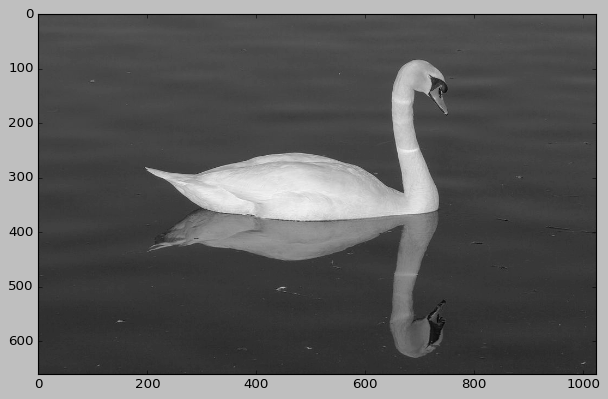

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F64FC191E10>


In [12]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [13]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [14]:
U.shape

(660, 660)

In [15]:
V.shape

(1024, 1024)

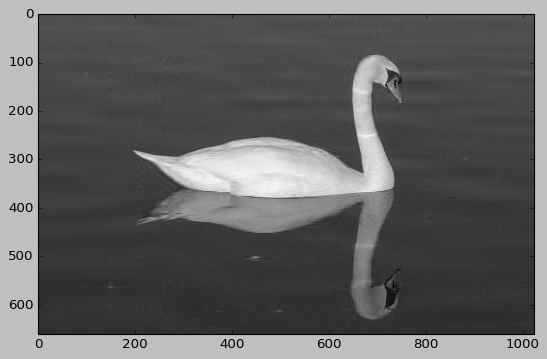

Felicidades la imagen está comprimida


In [16]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[210. 209. 207. ...  20.   6.  59.]


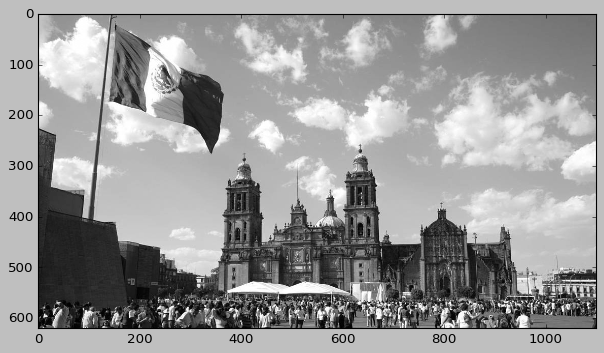

<PIL.Image.Image image mode=LA size=1100x619 at 0x7F65052A8F90>


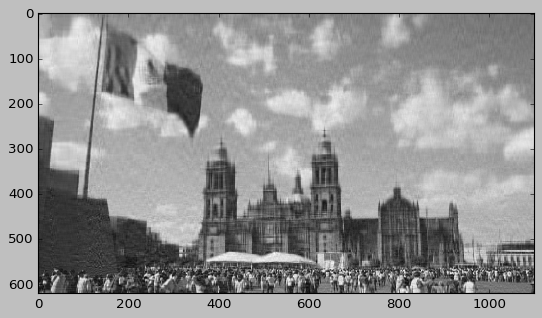

In [18]:
#imagen 1

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://static.euronews.com/articles/stories/06/89/07/72/1100x619_cmsv2_beb1fa97-ea80-541b-ab06-022c712ccc5b-6890772.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)
U,D,V = np.linalg.svd(imgmat)
imgmat.shape
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()

[255. 255. 255. ... 255. 255. 255.]


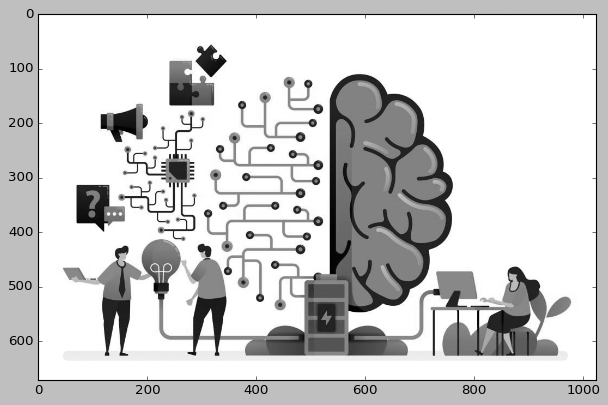

<PIL.Image.Image image mode=LA size=1024x671 at 0x7F64FA2BB790>


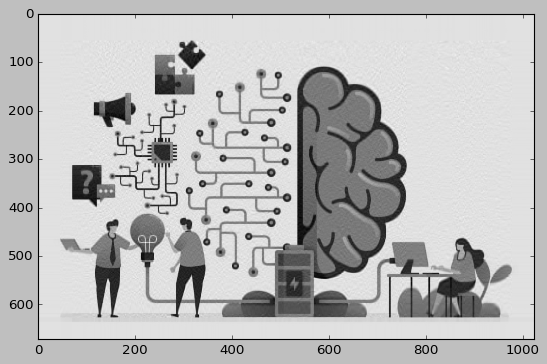

In [20]:
#imagen 2

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://masterdatascience.online/wp-content/uploads/2020/02/706-1024x671.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)
U,D,V = np.linalg.svd(imgmat)
imgmat.shape
nvalue = 100
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()

[255. 255. 255. ... 255. 255. 255.]


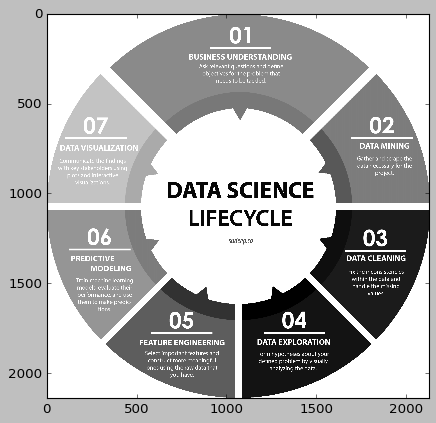

<PIL.Image.Image image mode=LA size=2127x2136 at 0x7F64FA1F0CD0>


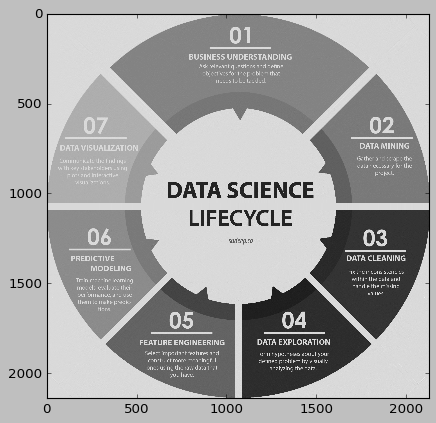

In [23]:
#imagen 3

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://www.sudeep.co/images/post_images/2018-02-09-Understanding-the-Data-Science-Lifecycle/chart.png')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)
U,D,V = np.linalg.svd(imgmat)
imgmat.shape
nvalue = 550
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [24]:
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

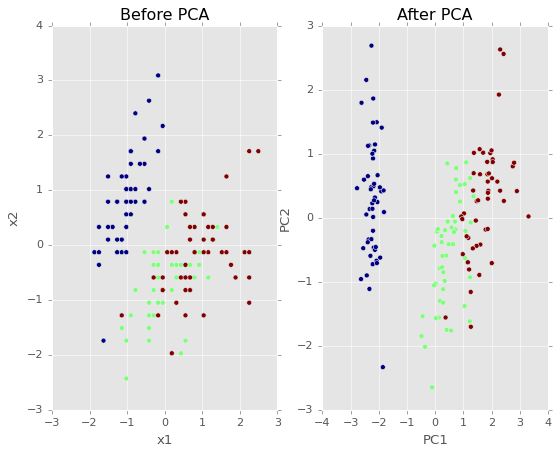

In [25]:
#Gráficas antes yd espués de PCA, con colores para distinguir las muestras
fig, axes = plt.subplots(1,2)

axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [27]:
print(pca.explained_variance_ratio_)

np.cov(X_new.T)
array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

pca.explained_variance_ 
array([2.93808505, 0.9201649])

print(abs(pca.components_))




[0.72962445 0.22850762]
[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [28]:
#el autor del ejercicio decidió crear una función para hacer el plot, ya que no existe una función nativa en python:

def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''    
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

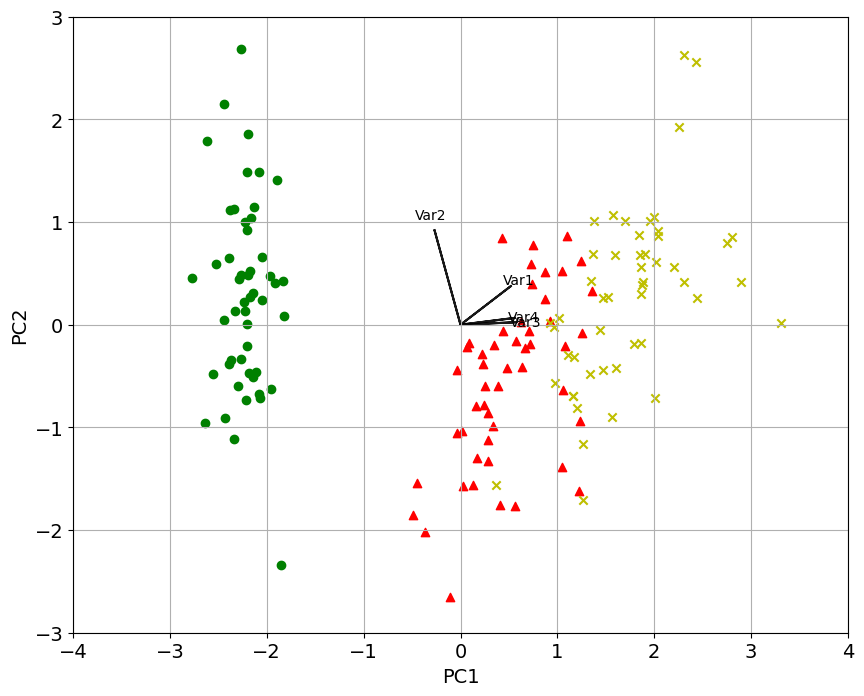

In [30]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [33]:
# Var 3 and Var 4 are extremely positively correlated
print(np.corrcoef(X[:,2], X[:,3])[1,0])

# Var 2and Var 3 are negatively correlated
print(np.corrcoef(X[:,1], X[:,2])[1,0])


0.9628654314027957
-0.42844010433054014


Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

Ambas técnicas fueron una introducción a técnicas de manejo de datos, tanto SVD como PCA nos ayudan a poder trabajar con datos con variables co-relacionadas y con gran volumen (dimensionalidad), logrando fácil su comprensión y graficarlas.
Técnicas como PCA son benéficas para eliminar el ruido y lograr comprimir datos

¿Qué es feature importance y para que nos sirve?
una feature, o variables es una parte importante del proceso de análisis de datos y en técnicas como PCA, el proceso de feature importante, significa seleccionar las variables que son importantes; La importancia de cada variable se refleja en la magnitud de los valores correspondientes en los vectores propios (mayor magnitud, mayor importancia).

¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?
En el ejercicio 3 nos dimos cuenta visualmente de como las variables son importantes y que fueron 1, 3 y 4 las que en el ejercicio fueron particualmente útiles (principales)

¿Dónde lo aplicarías o te sería de utilidad este conocimiento?
--> cuanto se tenga un escenario de correlación amplio y con un gran volumen de datos.

